In [4]:
#comment
#observation

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('stud.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Finding Outliers

--------------- 1st Way--------------------

<AxesSubplot:xlabel='reading score'>

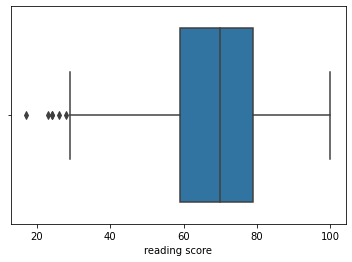

In [9]:
sns.boxplot(df['reading score'])

<AxesSubplot:xlabel='math score'>

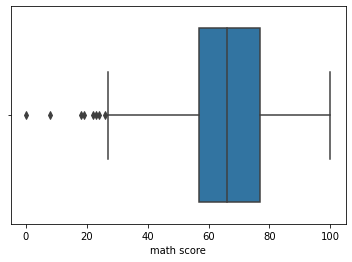

In [10]:
sns.boxplot(df['math score'])

----------------------- 2nd Way ---------------------------

In [11]:
#25% of data: q1 ;  75% of data: q3
q1 = df['math score'].quantile(0.25)
q3 = df['math score'].quantile(0.75)
q1, q3

(57.0, 77.0)

In [12]:
IQR = q3-q1
IQR

20.0

In [13]:
lower_fence = q1-1.5*(IQR)
upper_fence = q3+1.5*(IQR)
print(f"Value of Lower fence is: {lower_fence}  and  value of Upper fence is: {upper_fence}")

Value of Lower fence is: 27.0  and  value of Upper fence is: 107.0


In [14]:
df[df['math score'] < lower_fence]
#data(df) below this are outliers 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23


In [15]:
df[df['math score'] > upper_fence]
#data(df) above this are outliers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


-------------------- 3rd way --------------------------------

:By using Function

In [16]:
#return only numerical columns in list format
num_col = [feature for feature in df.columns if df[feature].dtypes != 'object']
num_col

['math score', 'reading score', 'writing score']

In [17]:
df_num = df[num_col]
df_num

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [26]:
#by using function

def outlier_threshold(df,variable):
    q1=df[variable].quantile(0.25)
    q2=df[variable].quantile(0.75)
    iqr=q2-q1
    upper_fence = q2+(1.5*iqr)
    lower_fence = q1-(1.5*iqr)
    return lower_fence,upper_fence


In [30]:
outlier_threshold(df_num, 'math score')

(27.0, 107.0)

In [ ]:
# observation: data below 27 and above 107 are considered to be outlier

By Violen Plot

<AxesSubplot:>

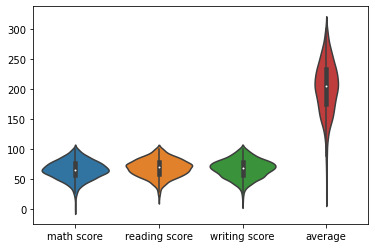

In [73]:
sns.violinplot(data=df)
#downward pointing tail shows outlier

# Graphical representation of balance and imbalance data

In [40]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [74]:
# Merging of columns and make a new column as 'average'

In [42]:
df['average'] = df['math score'] + df['writing score'] + df['reading score'] 
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247


In [43]:
df_grp = df.groupby('gender').mean()
df_grp

,math score,reading score,writing score,average
gender,,,,
female,63.633205,72.608108,72.467181,208.708494
male,68.728216,65.473029,63.311203,197.512448


 Multivariate graph of 'gender' w.r.to 'reading score', 'writing score', 'math score'.

In [49]:
avg_f = df_grp['average'][0]
avg_m = df_grp['average'][1]
avg_f, avg_m

(208.70849420849422, 197.5124481327801)

In [51]:
read_f = df_grp['reading score'][0]
read_m = df_grp['reading score'][1]
read_f, read_m

(72.60810810810811, 65.47302904564316)

In [52]:
write_f = df_grp['writing score'][0]
write_m = df_grp['writing score'][1]
write_f, write_m

(72.46718146718146, 63.31120331950208)

In [60]:
math_f = df_grp['math score'][0]
math_m = df_grp['math score'][1]
math_f, math_m

(63.633204633204635, 68.72821576763485)

In [61]:
female_score = avg_f, read_f, write_f, math_f
female_score

(208.70849420849422, 72.60810810810811, 72.46718146718146, 63.633204633204635)

In [54]:
male_score = avg_m, read_m, write_m
male_score

(197.5124481327801, 65.47302904564316, 63.31120331950208)

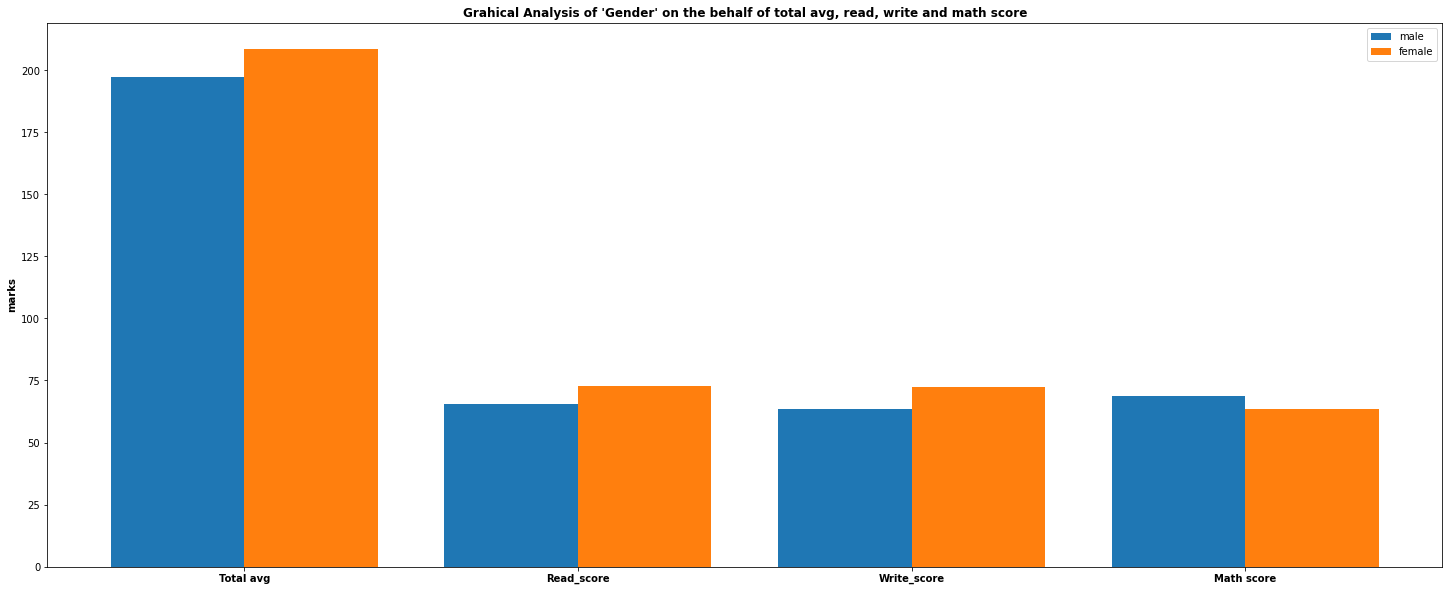

In [69]:
plt.figure(figsize=(25,10))
X=['Total avg','Read_score', 'Write_score', 'Math score']

female_score = avg_f, read_f, write_f, math_f
male_score = avg_m, read_m, write_m, math_m

X_axis=np.arange(len(X))

plt.bar(X_axis-0.2,male_score,0.4,label='male')
plt.bar(X_axis+0.2,female_score,0.4,label='female')

plt.xticks(X_axis,X, fontweight='bold')
plt.ylabel("marks", fontweight='bold')
plt.title("Grahical Analysis of 'Gender' on the behalf of total avg, read, write and math score",fontweight='bold')
plt.legend()
plt.show()

This Graph shows the differences of scoe=res on the behalf of Gender

# Checking whether the distribution is Normal

In [77]:
# Log Transformation
df_log = np.log(df_num['reading score'])
df_log

0      4.276666
1      4.499810
2      4.553877
3      4.043051
4      4.356709
         ...   
995    4.595120
996    4.007333
997    4.262680
998    4.356709
999    4.454347
Name: reading score, Length: 1000, dtype: float64

In [78]:
df_nomal = df_num['reading score']
df_nomal

0      72
1      90
2      95
3      57
4      78
       ..
995    99
996    55
997    71
998    78
999    86
Name: reading score, Length: 1000, dtype: int64

<AxesSubplot:xlabel='reading score', ylabel='Density'>

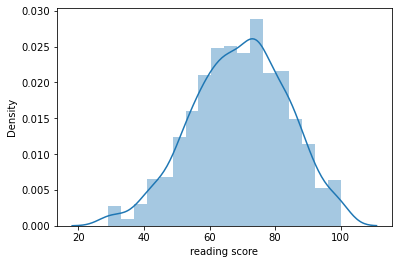

In [82]:
sns.distplot(df_nomal)

<AxesSubplot:xlabel='reading score', ylabel='Density'>

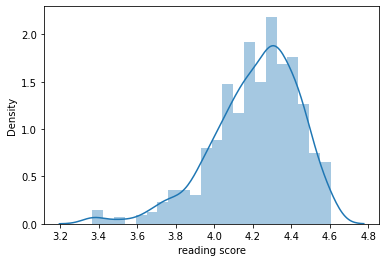

In [83]:
sns.distplot(df_log)

In [84]:
#observation: After log transformation data is not normally distributed

# Finding and Replacing Missing Values

In [86]:
# Replacing Nan Values with string 'NOT FOUND'

df['reading score'].fillna("NOT FOUND", inplace = True)
df['reading score']

0      72
1      90
2      95
3      57
4      78
       ..
995    99
996    55
997    71
998    78
999    86
Name: reading score, Length: 1000, dtype: int64

In [88]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average                        0
dtype: int64

In [89]:
#observation: As there is no 'Nan' value , if it was present then replaced by string 'NOT FOUND'

# Encoding

 here changing Math integer column to float column 

In [93]:
df['math score'] = df['math score'].astype(float)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72.0,72,74,218
1,female,group C,some college,standard,completed,69.0,90,88,247
2,female,group B,master's degree,standard,none,90.0,95,93,278
3,male,group A,associate's degree,free/reduced,none,47.0,57,44,148
4,male,group C,some college,standard,none,76.0,78,75,229
